# Machine Learning Project: Predicting the Price of a Used Car

## Table of Contents
#### [Import and Load the Data](#import)
#### [Preprocessing](#preprocessing)
#### [Exploring the Probability Distribution Functions (PDFs)](#pdf)
#### [Checking the OLS Assumptions](#ols)
#### [Dummy Variables](#dummy)
#### [Creating the Linear Regression Model](#regression)
#### [Train Test Split](#train_test)
#### [Weights and Biases](#weight_bias)
#### [Testing](#testing)
#### [Analysis](#analysis)


## Importing the Libraries <a class="anchor" id="import"></a>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Loading the Data

In [2]:
raw_data = pd.read_csv('Used car information.csv')

# Quick look at the data
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing <a class="anchor" id="preprocessing"></a>

### Exploring the Descriptive Statistics of the Variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Key Observations
##### General
* The counts for several variables are different so it can be assumed that there are missing values.

##### Identify Important Variables 
* **'Brand'**: Some car brands are known to be generally more expensive than others, thus Brand is a potential regressor.
* **'Mileage'**: The more miles a car has driven the less we would expect it to cost.
* **'EngineV'**: (Engine Volume) - sports cars have larger engines and economy cars have smaller engines. 
* **'Year' of production**: The older the car is, the cheaper it would be expected to be. 
* The rest are categorical varibales that will be dealt with on a case by case basis.

##### Unique Entries
* **'Model'** has 312 unique models. This is too many and is too difficult to implement in a regression; it would mean having over 300 dummy variables, so this variable will be dropped.

### Drop 'Model'

In [4]:
# Create new copy of the data without the 'Model' variable.
data = raw_data.drop(['Model'],axis=1)

# Check the descriptives without 'Model'
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Missing Values

In [5]:
# Check for missing values
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [6]:
# Sum the Trues and Falses to see the total number of missing values for each feature
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

### Key Observations
* The above table shows that only Price and Engine Volume have missing values, 172 and 150 respectively.
* 172 and 150 represents less than 5% of the total number observations, so it is deemed reasonable to remove them from the data. 

In [7]:
# Drop all missing values and store the result in a new variable
data_no_mv = data.dropna(axis=0)

In [8]:
# Check the descriptives without the missing values
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Exploring the Probability Distribution Functions (PDFs) <a class="anchor" id="pdf"></a>

### Price

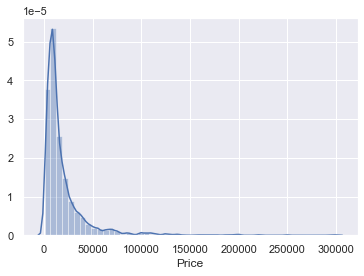

In [9]:
# Assess the PDFs of the Price variable
sns.distplot(data_no_mv['Price'])

#### Key Observations
* Price appears to have an exponential distribution, which could be a problem for our regression (ideally each variable would have a normal distribution)
* Looking back at the descriptives helps us assess the PDF further as we see some other information:
    * Mean is around 19,000
    * Minimum is 600
    * 25% of prices are under 7,000, 50% are under 11,500 and 75% are lower than 21,900, but the maximum price is 300,000 so it appears there are some outliers. 
* Outliers will have a big effect the regression as they will cause the coefficients to be inflated as the regression tries to place the line closer to those values.
* The outliers are on the right side of the graph so we will remove the top 1% of observations.

### Dealing with the Outliers

In [10]:
# Remove 1% of the problematic samples
# Create a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)

# Create a new data frame, with the condition that all prices must be below the 99th percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]

# Check the descriptives of the new data frame
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


#### Key Observations
* The maximum value is now around 130,000 (the 99th percentile).
* 130,000 is still quite far away from the mean (~18,000) but it is acceptably closer than 300,000.

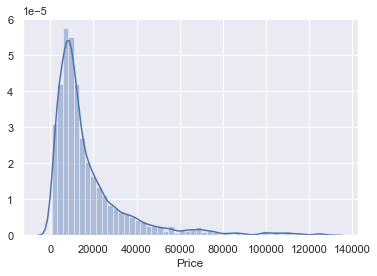

In [11]:
# Check the new PDF of Price
sns.distplot(data_1['Price'])

#### Key Observation
* The PDF is still distributed in the same way but with less, and less extreme, outliers.

### Mileage

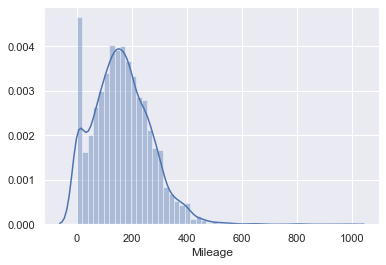

In [12]:
# Check the PDF of Mileage
sns.distplot(data_no_mv['Mileage'])

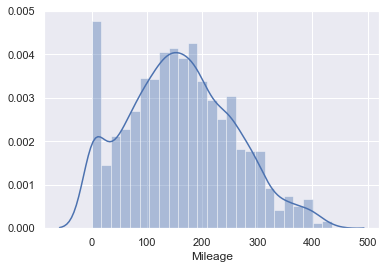

In [13]:
# Similar to Price, there are some extreme outliers so we remove the top 1% of observations

# Create a new data frame, with the condition that all prices must be below the 99th percentile of 'Mileage'
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

# Check the new PDF of Mileage
sns.distplot(data_2['Mileage'])

### Engine Volume

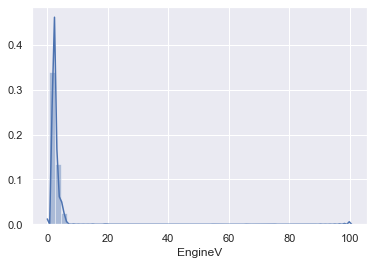

In [14]:
#  Check the PDF of Engine Volume
sns.distplot(data_no_mv['EngineV'])

#### Key Observations
* This is a very strange distribution and requires thorough investigation. 
    * After manually checking the data it appears that missing values are indivated with 99.9 or 99 which is greatly skewing the results.
    * There also appear to be some incorrect values like '75'. 
* Further industry research indicates that car engine volumes are generally <6.5L. 
* Therefore, it is deemed reasonable to remove all values above 6.5.

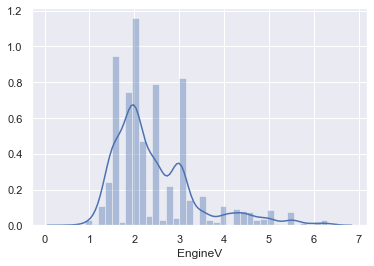

In [15]:
# Keep values below 6.5 (thus removing those above 6.5)
data_3 = data_2[data_2['EngineV']<6.5]

# Check PDF of the new Engine Volume
sns.distplot(data_3['EngineV'])

### Year

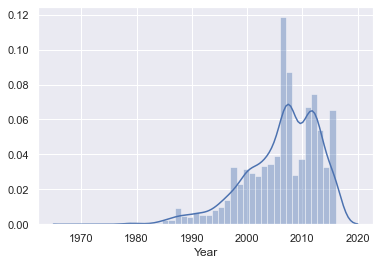

In [16]:
# Check the PDF of Year
sns.distplot(data_no_mv['Year'])

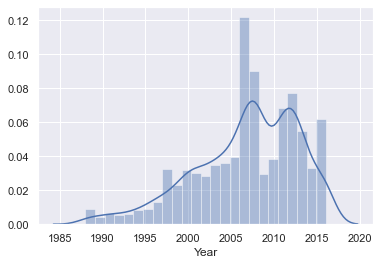

In [17]:
# Year is similar to Price and Mileage except that the outliers for Year are on the left side of the graph

# Create a variable, q, that contains the 1st percentile and keep all values that are higher than it.
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

# Check new PDF of Year
sns.distplot(data_4['Year'])

### Reset the Index

In [18]:
# As observations have been removed it is necessary to reset the index (because the original indexes are preserved)
# to avoid any indexing issues later on.
data_cleaned = data_4.reset_index(drop=True)

# Check descriptives
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the Ordinary Least Squares (OLS) Assumptions <a class="anchor" id="ols"></a>

### Linearity

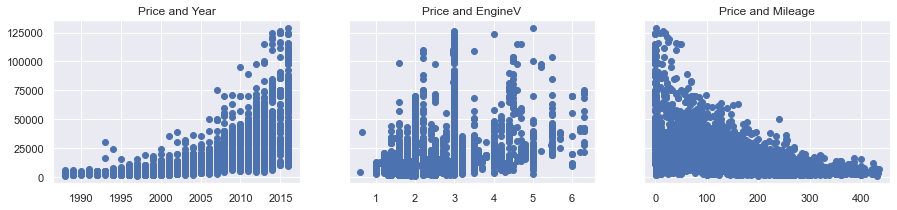

In [19]:
# Check for linearity using a scatterplot; plot graphs side by side for easy comparison (Price is the y axis for each graph)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

### Key Observations
* We can see patterns, but not linear ones. 
* Thus, we know we should not run a linear regression in this case; we should first transform one or more variables.

### Transforming Price

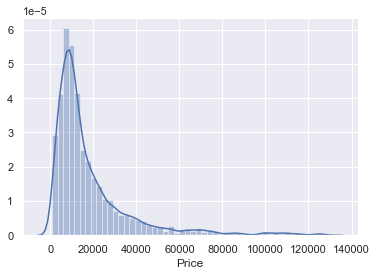

In [20]:
# From the PDF of price, it is easily determinde that 'Price' is exponentially distributed
# Thus we use a log transformation
# Check PDF of Price
sns.distplot(data_cleaned['Price'])

In [21]:
# Transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Add log_price to our data frame as a column
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


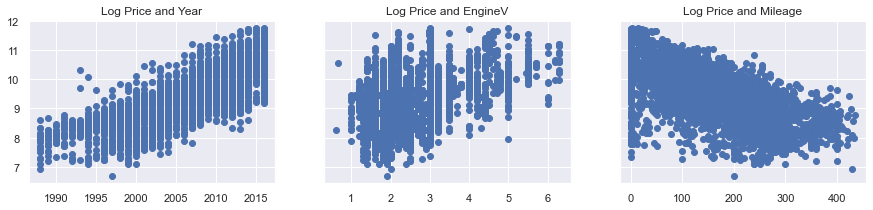

In [22]:
# Check the three scatter plots to assess the results of using log_price
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

### Key Observations
* The lines fit the data much better
* The relationships show a clear linear relationship. 
* This is good linear regression material.

In [23]:
# The log_price variable will be used so the original 'Price' variable can be dropped from the table as it is 
# now no longer needed
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [24]:
# Check table
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


### Normality and Homoscedasticity
* Normality is assumed for a big sample, following the central limit theorem. 
* The zero mean of the distribution of errors is accomplished through the inclusion of the intercept in the regression.
* The homoscedasticity assumption generally holds as we can see in the graphs.

### No Autocorrelation
* The observations are not from time-series or panel data. The observations are simply a snapshot of the current situation at a second hand car sales website. Each row comes from a different customer who was willing to sell their car on the platform. 
* Logically there is no reason for the observations to be dependent on each other. Therefore, the observations are independent of one another, and thus, the no autocorrelation assumption is not violated. 

### Multicollinearity
#### Initial Thoughts
* It is logical that year and mileage are going to be correlated; the newer the car, the lower its mileage. Therefore, we have grounds to expect some degree of multicollinearity in the data.

In [25]:
# Quick look at the columns of our data frame
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [26]:
# Import the VIF method from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the variables to be checked for multicollinearity
variables = data_cleaned[['Mileage','Year','EngineV']]

# Create a new data frame which includes all the VIFs
vif = pd.DataFrame()

# Attain the VIFs
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Add column name so it's easier to explore the result
vif["Features"] = variables.columns

# Explore results
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


### Key Observations
* Year is definitley too correlated with other variables so will have to be removed.
* Engine Volume is perhaps borderline; its VIF will likely be driven down by the removal of Year so it will be kept for now.

In [27]:
# Remove Year from the model
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

# Check data frame
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


## Create Dummy Variables <a class="anchor" id="dummy"></a>

In [28]:
# Create dummy varibales so categorical variables can be included in the regression
# Key Note: Drop one of the dummies so we don't introduce multicollinearity. 
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [29]:
# Check result
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Organise the Data frame

In [30]:
# Put the dependent variable at the start of the data frame
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [31]:
# Create a new variable that will contain the preferred order (Order is: dependent variable, indepedendent numerical variables, dummies)
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [32]:
# Reorder by creating a new data frame which is the same as the original one but with the new order of features
data_preprocessed = data_with_dummies[cols]

# Check the data frame
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Model <a class="anchor" id="regression"></a>

### Declare the Inputs and Targets

In [33]:
# The target (dependent variable) is 'log_price'
targets = data_preprocessed['log_price']

# Declare the inputs (everything except the dependent variable, so we can simply drop the dependent variable log_price)
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the Data

In [34]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the inputs
scaler.fit(inputs)

StandardScaler()

In [35]:
# Use the transform method to get the standardised inputs
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

## Train Test Split <a class="anchor" id="train_test"></a>

In [36]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=45)

### Create the Regression

In [37]:
# Create a linear regression object
reg = LinearRegression()

# Fit the regression with the scaled train inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

### Check the Results: Plot the predicted values of the regression against the observed values (targets)

In [38]:
# Get the predicted values and store them in y_hat
y_hat = reg.predict(x_train)

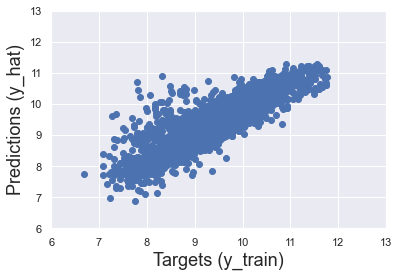

In [39]:
# Compare the targets (y_train) and the predictions (y_hat) by plotting them on a scatter plot
# Note: looking for a 45 degree line to indicate good predictions; i.e. if prediction was 7, ideally target is 7
plt.scatter(y_train, y_hat)
            
# Name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
            
# Limit the x and y axes so the graph is comparable and interpretable
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

### Residual Plot Check

Text(0.5, 1.0, 'Residuals PDF')

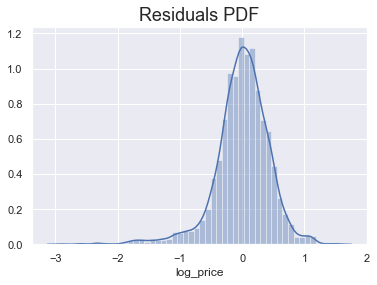

In [40]:
# Plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Name the graph title
plt.title("Residuals PDF", size=18)

### Key Observations
* Ideally the plot is normally distributed; this result looks quite normal in the sense of it being normally distributed, and the mean seems to be 0.
* There are quite a few negative residuals (far away from the mean) as indicated by the longer tail on the negative side; there are certain observations for which (y_train - y_hat) is much lower than the mean (thus a much higher price has been predicted than has been observed). This implies that those predictions tend to overestimate the targets.
* There are no such observations on the right side so we can conclude that our predictions rarely underestimate the targets. This can serve as a guidance on how to better our model.
* Given the definition of the residuals (y_train - y_hat), negative values imply that y_hat (predictions) are much higher than y_train (the targets); this is useful information for improving the model.

### R Squared

In [41]:
# Find the R-squared of the model
reg.score(x_train,y_train)

0.7534647625452227

### Interpretation
* Our model is explaining around 75% of the variability of the data. This is a relatively good result but could be better.

### Find the Weights (coefficients) and Bias (intercept) <a class="anchor" id="weight_bias"></a>

In [42]:
# Obtain the bias (intercept) of the regression
reg.intercept_

9.413930624356142

In [43]:
# Obtain the weights (coefficients) of the regression
reg.coef_

array([-0.45877002,  0.21142619,  0.01446319,  0.00686897, -0.14354616,
       -0.18592516, -0.06165806, -0.09631008, -0.14811302, -0.09380062,
       -0.19099589, -0.12311884, -0.16445067, -0.12501996, -0.0282085 ,
       -0.14821545,  0.32383601])

In [44]:
# Create a regression summary for easy comparison
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.458770
1,EngineV,0.211426
2,Brand_BMW,0.014463
3,Brand_Mercedes-Benz,0.006869
4,Brand_Mitsubishi,-0.143546
5,Brand_Renault,-0.185925
6,Brand_Toyota,-0.061658
7,Brand_Volkswagen,-0.096310
8,Body_hatch,-0.148113
9,Body_other,-0.093801


### Key Observations
* This table is far from interpretable: the dependent variable is a logarithm and all features are standardised, including the dummies, but we work with what we've got...

#### Weights Interpretation 
* Some weights are positive and some are negative so further exploration is required.

##### Continuous Variables
1. A positive weight shows that as a feature increases in value, so do the log_price and 'Price' respectively. An example is EngineV; the bigger the engine volume, the higher the price.

2. A negative weight shows that as a feature decreases in value, log_price and 'Price' decrease. An example is 'Mileage'; the more a car is being the driven, the lower the price gets. 

##### Dummy Variables
1. A positive weight shows that the respective category (Brand) is more expensive than the benchmark (Audi).

2. A negative weight shows that the respective category (Brand) is less expensive than the benchmark (Audi).

In [45]:
# Check the different categories in the 'Brand' variable we can see which 'Brand' is the benchmark
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### Interpretation
* There are 7 brands: BMW, Mercedes-Benz, Audi, Toyota, Renault, Volkswagen, and Mitsubishi. 
* By looking at the weights table we can see that 'Audi' was the dropped one as it is not in the weights table.
* Therefore, whenever all other dummies are 0, Audi is 1, so Audi is the benchmark.
* If another brand dummy is positive then, all else being equal, the respective brand is more expensive than Audi. For example, BMW's coefficient is positive so on average it will be more expensive than an Audi. Similarly, Mitsibushi has a negative weight so it will on average be less expensive than an Audi.  The Mercedes weight is positive but very close to 0, since the dummies are scaled we cannot be completely sure that a Mercedes is more expensive, but it seems to be as expensive as an Audi.

#### Size of the Weight
* The size of the weight is also important; the bigger the weight, the bigger the impact. 
* Mileage is the most prominent feature on this regression, it is more than twice as important as engine volume. 


In [46]:
# Check which category was dropped from the other categorical variables:
data_cleaned['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [47]:
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [48]:
data_cleaned['Registration'].unique()

array(['yes', 'no'], dtype=object)

## Testing <a class="anchor" id="testing"></a>

In [49]:
# The test inputs are 'x_test', while the outputs: 'y_test' 
y_hat_test = reg.predict(x_test)

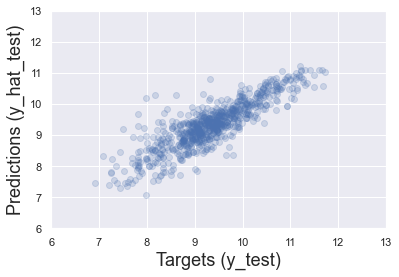

In [50]:
# Plot test targets against predicted targets to see if they resemble a 45 degree line:
# Create a scatter plot with the test targets and the test predictions
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

### Interpretation
* The plot looks quite good but there appears to be a higher concentration around the 45 degree line for higher prices; thus, our model is very good at predicting higher prices but not quite so good at predicting lower prices.

In [51]:
# Manually check these predictions:
# Obtain the actual prices by taking the exponential of the log_price
# df_pf stands for dataframe_performance
# We want interpretable prices (not the log of the prices); since the log is the opposite of the exponential, if we 
# take the exponentials of the log prices we will reach the original prices.
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,8458.162620
1,8776.258607
2,7625.973486
3,2429.886535
4,10159.525366


### Making the Data Easier to Compare

In [52]:
# Place the targets next to the predictions (which are now expressed as prices) for easy comparison
# Include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,8458.162620,4200.0
1,8776.258607,NaN
2,7625.973486,13300.0
3,2429.886535,23000.0
4,10159.525366,NaN
...,...,...
769,12296.423416,NaN
770,2185.312460,22900.0
771,16482.465660,NaN
772,7736.530900,7500.0


In [53]:
# There appear to be missing values so the y_test data frame is explored
y_test

575     8.881836
2       9.495519
555     9.230143
2121    8.342840
3572    9.059517
          ...   
3471    9.047821
553     7.843849
696     9.648595
228     9.546741
3081    8.716044
Name: log_price, Length: 774, dtype: float64

### Interpretation 
**Indices**: when the data was split into train and test the original indices were preserved. So, when y_test was added to df_pf pandas tried to match the indices. We need to forget this original indexing; overwrite y_test with y_test.reset_index(drop=True). This will reset the index of y_test

In [54]:
# Reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    8.881836
1    9.495519
2    9.230143
3    8.342840
4    9.059517
Name: log_price, dtype: float64

In [55]:
# Overwrite the 'Target' column with the appropriate values
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,8458.162620,7200.0
1,8776.258607,13300.0
2,7625.973486,10200.0
3,2429.886535,4200.0
4,10159.525366,8600.0
...,...,...
769,12296.423416,8500.0
770,2185.312460,2550.0
771,16482.465660,15500.0
772,7736.530900,13999.0


### Residuals

Now that we have the predictions and their targets, we can proceed to comparing them. We can create another column called 'Residual' which will be equal to the difference between the targets and the predictions. 

In [56]:
# Create Residual column
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [57]:
# Create a column displaying how far off we are from the result percentage-wise

df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,8458.162620,7200.0,-1258.162620,17.474481
1,8776.258607,13300.0,4523.741393,34.013093
2,7625.973486,10200.0,2574.026514,25.235554
3,2429.886535,4200.0,1770.113465,42.145559
4,10159.525366,8600.0,-1559.525366,18.134016
...,...,...,...,...
769,12296.423416,8500.0,-3796.423416,44.663805
770,2185.312460,2550.0,364.687540,14.301472
771,16482.465660,15500.0,-982.465660,6.338488
772,7736.530900,13999.0,6262.469100,44.735118


In [58]:
# Explore the descriptives to provide additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,14854.002151,16419.762016,1565.759864,36.199421
std,12097.921823,16931.435748,8738.028833,60.100393
min,1181.653440,999.000000,-37938.395008,0.012094
25%,7216.497428,7000.000000,-1948.718309,10.425379
50%,11271.217375,10900.000000,243.755743,23.253502
75%,17552.982810,18775.000000,3216.802303,41.809907
max,75105.005623,124000.000000,79833.063474,803.811455


### Interpretation
* The descriptives show us that the minimum difference in percentage is 0.01 (very accurate, almost exact!). However, the maximum difference in percentage is 803.81 (quite far off the mark!) 
* The 25th, 50th and 75th percentiles show us that most of our predictions were relatively close.

In [59]:
# Check these outputs manually
pd.options.display.max_rows = 999

# Display the result with only 2 digits after the dot to make the dataset clear
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
378,32403.92,32400.00,-3.92,0.01
614,17917.75,17900.00,-17.75,0.10
224,16817.04,16800.00,-17.04,0.10
160,12615.70,12650.00,34.30,0.27
587,8934.21,8900.00,-34.21,0.38
371,40200.72,39999.00,-201.72,0.50
252,11561.11,11500.00,-61.11,0.53
248,11059.81,10999.00,-60.81,0.55
184,8763.51,8700.00,-63.51,0.73
435,3830.91,3800.00,-30.91,0.81



## Analysis <a class="anchor" id="analysis"></a>
### Exploring the Dataframe
* Revising the dataframe manually allows for analysis of the observations for which we've got good predictions and for those that are very far off. 
* The observations at the bottom of the dataframe show there are very few predictions dramatically far off from the observed values.
* Looking closely at the very bottom of the targets column shows that most of the observed prices (targets) are extremely low (2900, 3500, 2500, 1800 etc.):
* On average the model is pretty decent at predicting the price, for the last samples though, it isn't. 

### Interpreting the Residual
* All the residuals for these outliers are negative, therefore their predictions are higher than the targets.
* In this case, an explanation for all the residuals being negative may be that the model is missing an important factor which drives the price of a used car lower. It may be the model of the car which was removed at the beginning of the analysis but it may also be that the car was damaged in some way, a piece of information we did not initially have. 

### How to Improve the Model
1. Use a different set of variables
2. Remove a bigger part of the outliers
3. Use differerent kinds of transformations